In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange
import math
import random
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

## Data Preprocessing 

In [2]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [3]:
# making copy 
df_cpy=df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# df['votes']= df['votes'].astype(int)

In [8]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23

In [9]:
# df['online_order'].unique()---------- alright
# df['book_table'].unique()------------ alright

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
#  remove 'NEW' and '/5' 
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

In [11]:
# df['rest_type'].unique() ------- all right
# df['dish_liked'].unique()
# df['cuisines'].unique()

df['dish_liked'] = df['dish_liked'].apply(lambda r: r.replace(", ",","))
df['dish_liked'] = df['dish_liked'].apply(lambda r: r.split(','))
df['cuisines'] = df['cuisines'].apply(lambda r: r.replace(", ",","))
df['cuisines'] = df['cuisines'].apply(lambda r: r.split(','))

In [12]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [13]:
# remove comma from approx_cost
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [14]:
#  dropping inessential columns
df.drop(['url','address','phone', 'menu_item', 'reviews_list'],axis=1,inplace=True)

In [15]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [16]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [17]:
#  cleaned data
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","[North Indian, Mughlai, Chinese]",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","[Chinese, North Indian, Thai]",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","[Cafe, Mexican, Italian]",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,[Masala Dosa],"[South Indian, North Indian]",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","[North Indian, Rajasthani]",600,Buffet,Banashankari


In [18]:
df.to_csv('cleaned_data.csv',index=False)

In [19]:
# Analysis

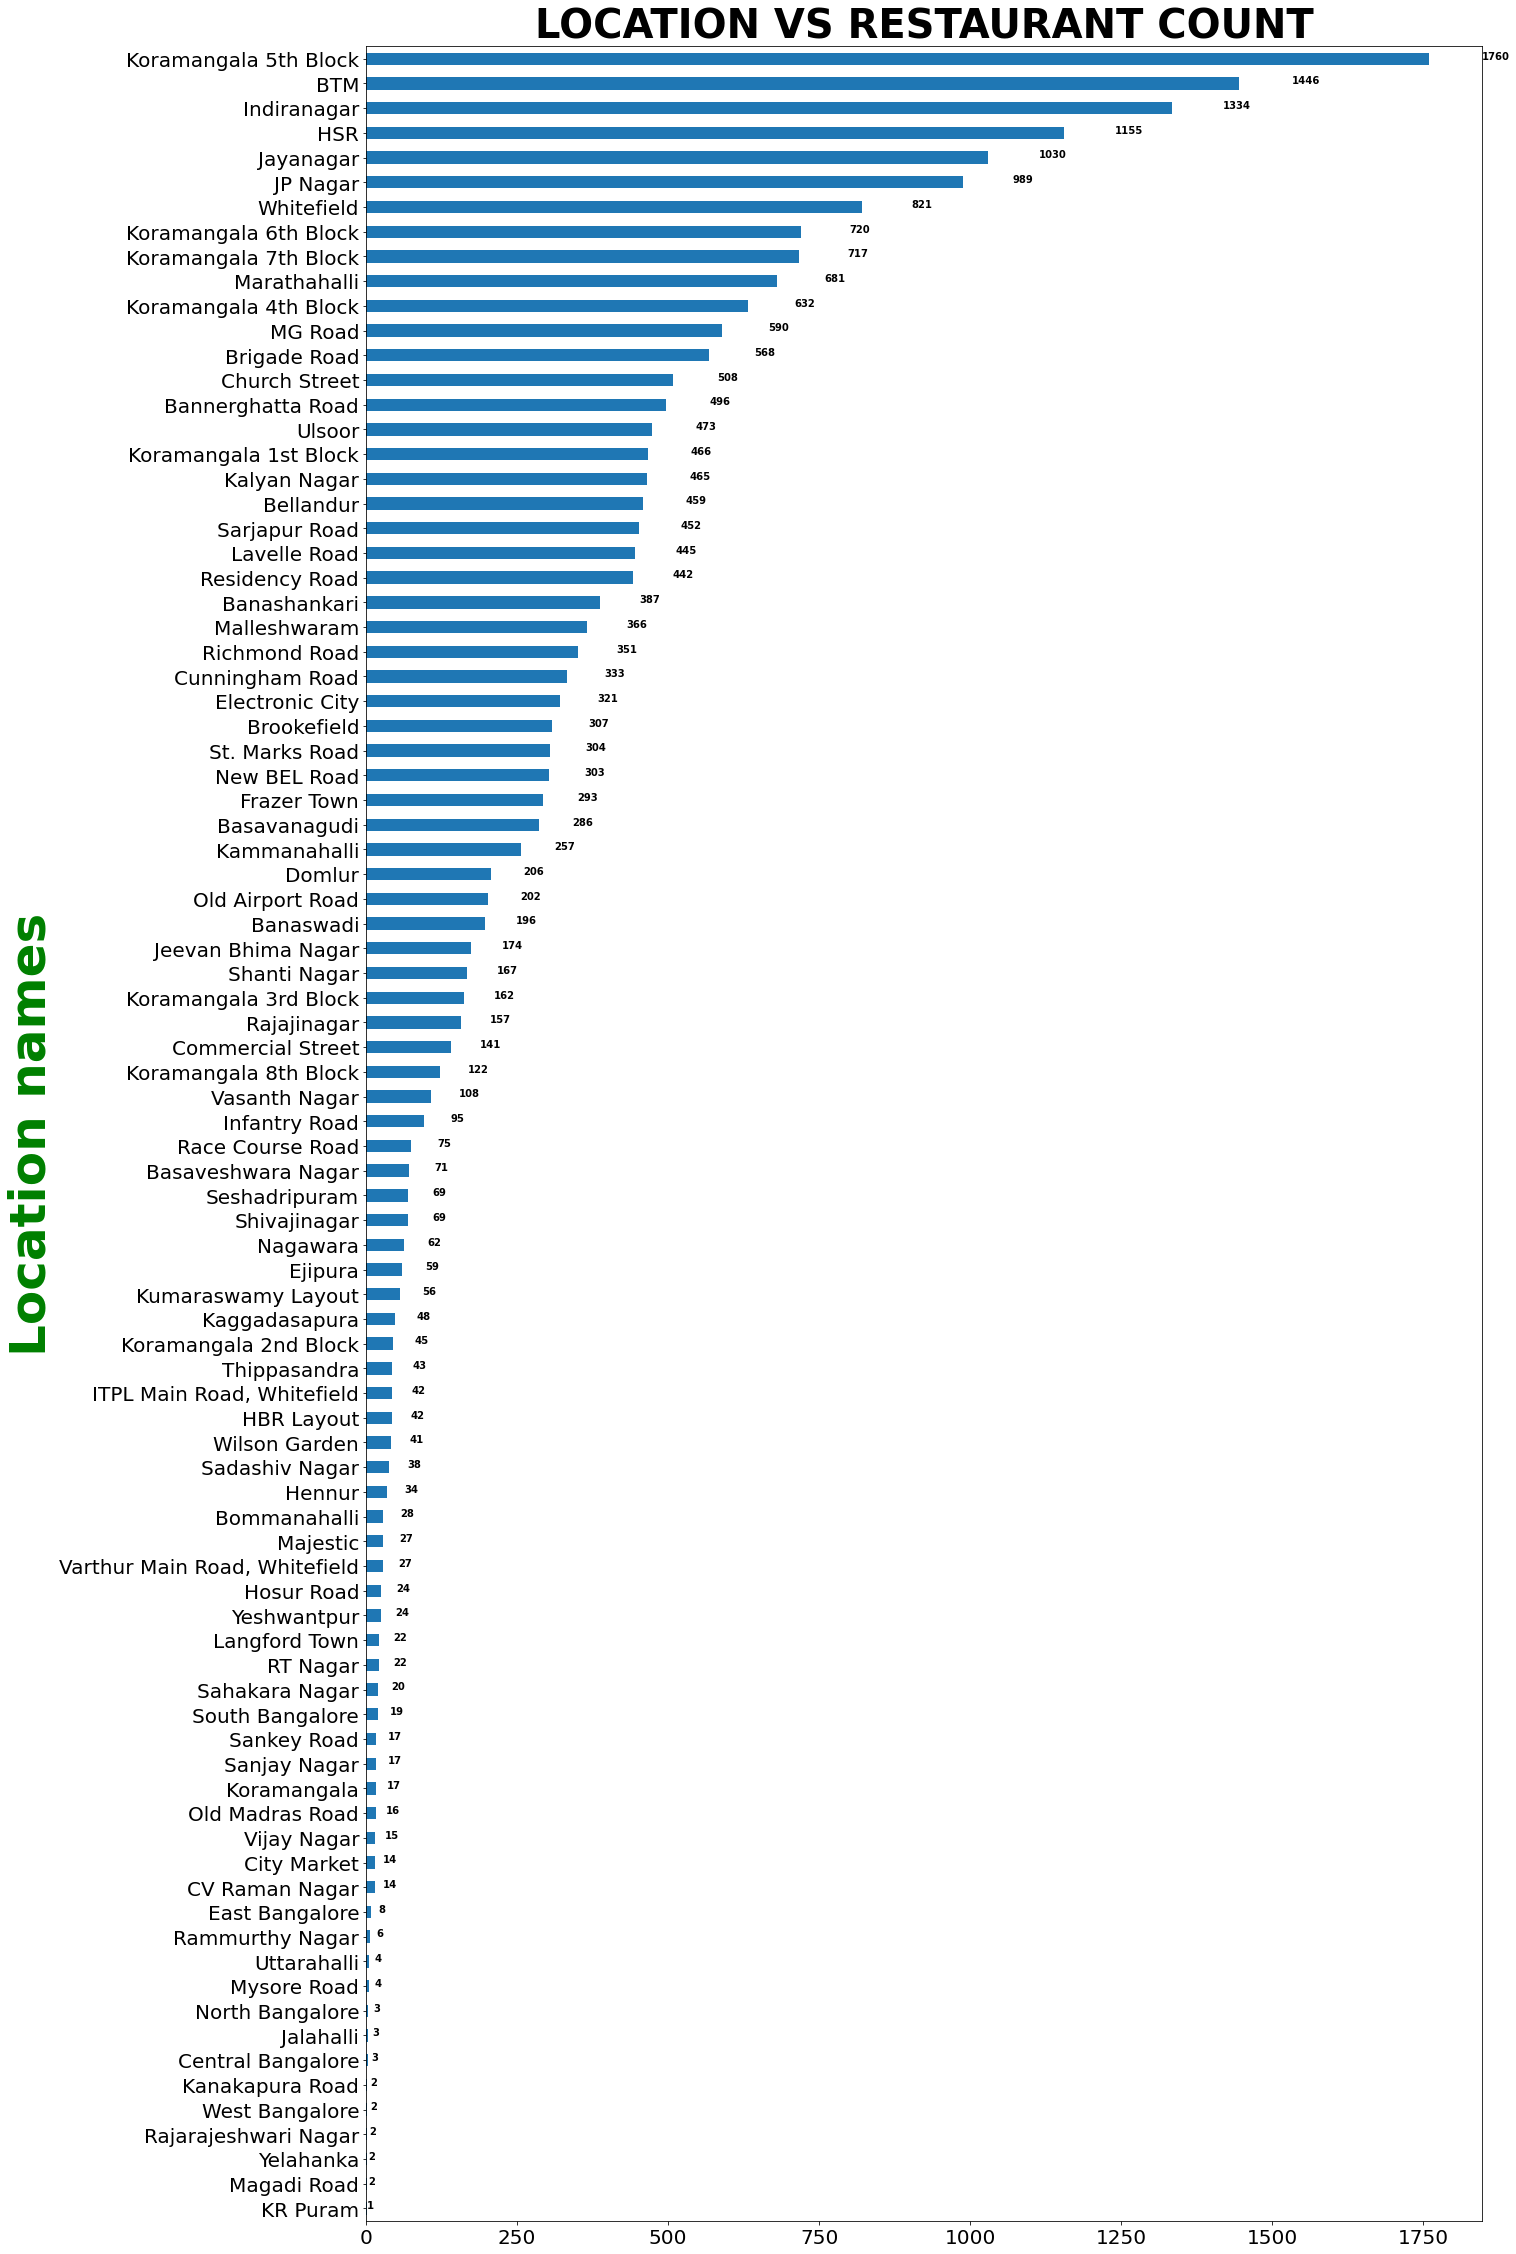

In [20]:

 Totallocation=df['location'].value_counts().sort_values(ascending=True)


fig=plt.figure(figsize=(20,40))
Totallocation.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="green",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(Totallocation)):
    plt.text(v+Totallocation[v],v,Totallocation[v],fontsize=10,color="BLACK",fontweight='bold')

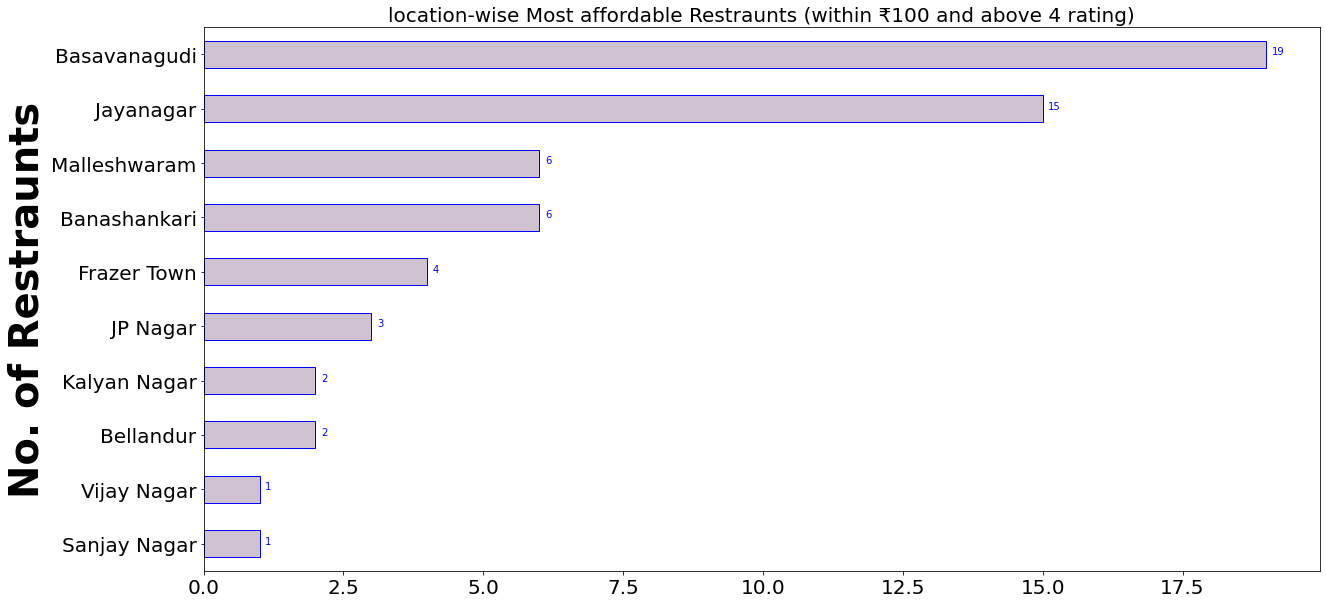

In [21]:
fig=plt.figure(figsize=(20,10))
temp1=df[(df['approx_cost(for two people)']<=100) & (df['rate']>4)]["location"].value_counts().sort_values(ascending=True)
temp1.plot(kind="barh",fontsize=20,color=(0.4, 0.2, 0.4, 0.3),edgecolor='blue')
plt.ylabel("No. of Restraunts",fontsize=40,color="black",fontweight='bold')
plt.title("location-wise Most affordable Restraunts (within ₹100 and above 4 rating)",fontsize=20,color="BLACK",fontweight='normal')
for i, v in enumerate(temp1):
    plt.text(v+0.1, i , str(v), color='blue', fontweight='medium')
    


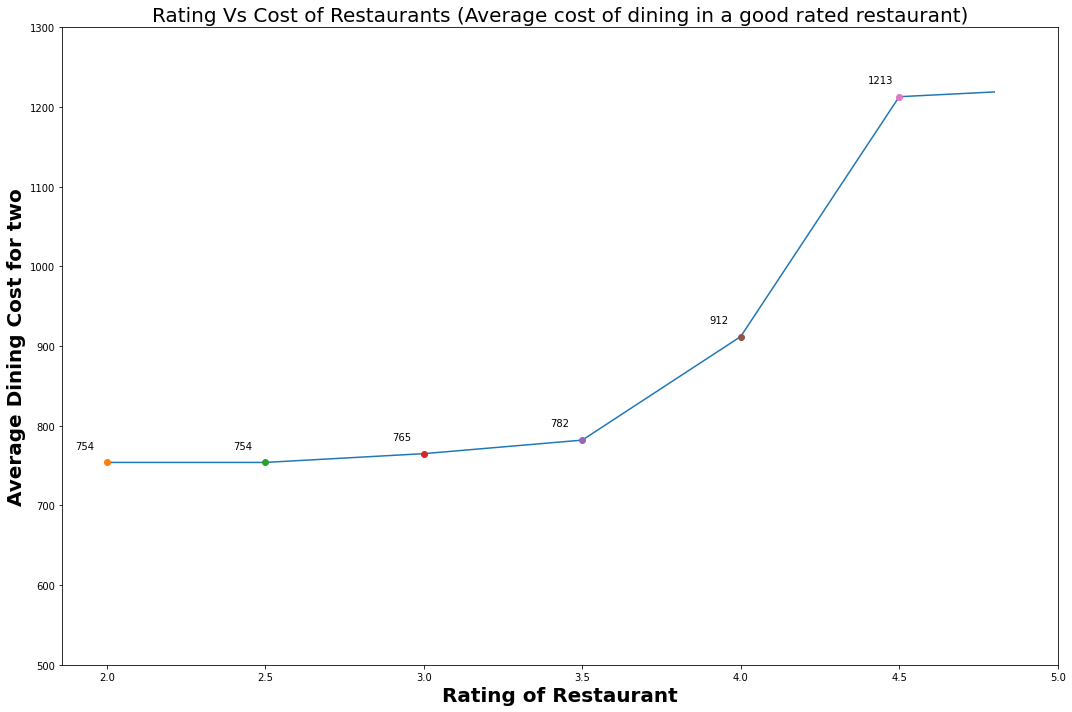

In [22]:


final_rating_list= list(arange(2.0, 5.0, 0.5))
final_rating_list.append(4.8)

rating_to_cost = {}


for rating in final_rating_list:
    average_cost_in_rated_rest = (df[df['rate']>=rating]['approx_cost(for two people)']).mean()
    rating_to_cost[rating]= int(average_cost_in_rated_rest)

fig=plt.figure(figsize=(15,10))

x_axis_values = list(arange(2.0, 5.0, 0.5))
y_axis_values=[]

for rating in x_axis_values:
    value=(df[df['rate']>=rating]['approx_cost(for two people)']).mean()
    y_axis_values.append(int(value))
    

cost_plotting= list(rating_to_cost.values())
plt.plot(final_rating_list, cost_plotting)


for i,j in zip(x_axis_values,y_axis_values):
    plt.plot(i, j,'o')
    plt.annotate(str(j),xy=(i-0.1 ,j+17))


plt.title('Rating Vs Cost of Restaurants (Average cost of dining in a good rated restaurant)',fontsize=20,color="black",fontweight='normal')
plt.xlabel('Rating of Restaurant',fontsize=20,color="black",fontweight='bold')
plt.ylabel('Average Dining Cost for two',fontsize=20,color="black",fontweight='bold')
plt.xticks(list(arange(2.0, 5.5, 0.5)))
plt.yticks(list(arange(500, 1400, 100)))
plt.tight_layout()
plt.show()

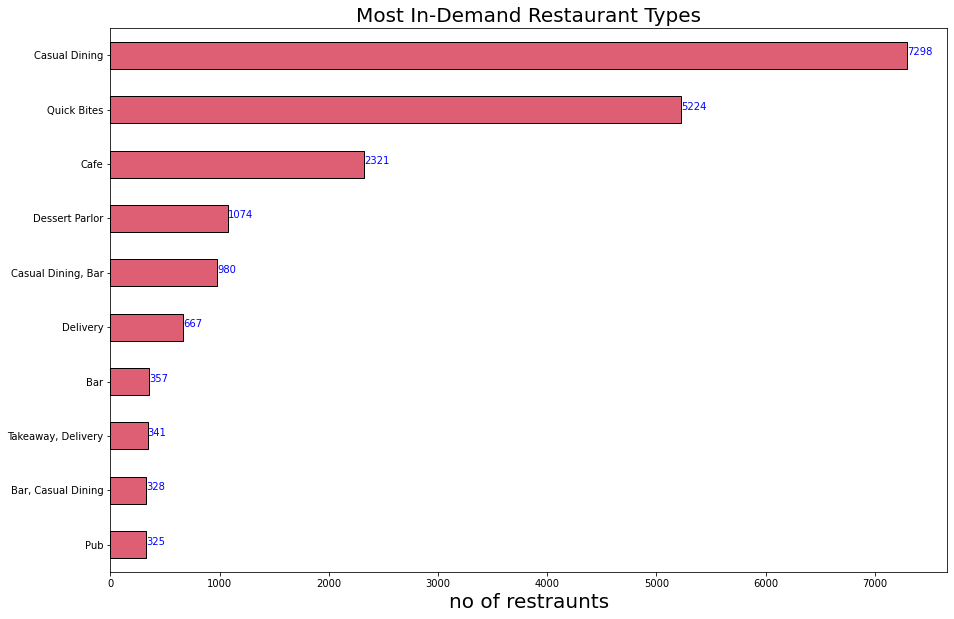

In [23]:
from collections import Counter
fig=plt.figure(figsize=(15,10))
temp2=df['rest_type'].value_counts()[:10].sort_values(ascending=True)
temp2.plot(kind="barh",color='#de5f73',edgecolor="black")
plt.title("Most In-Demand Restaurant Types",fontsize=20,color="black",fontweight='normal')
plt.xlabel("no of restraunts",fontsize=20,color="black",fontweight='normal')
for i, v in enumerate(temp2):
    plt.text(v+0.1, i , str(v), color='blue', fontweight='medium')

In [24]:
labels = ["Yes",'No']
values = df['online_order'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(textfont_size=20,
                  marker=dict( line=dict(color='#000111', width=2)))

fig.update_layout(title="Online delivery availability ",
                  titlefont={'size': 20},      
                  )
fig.show()

In [25]:
labels = ["Yes",'No']
values = df['book_table'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(textfont_size=20,
                  marker=dict( line=dict(color='#000111', width=2)))

fig.update_layout(title="Table booking availability ",
                  titlefont={'size': 20},      
                  )
fig.show()

In [26]:

# values = df['listed_in(type)'].value_counts()

# labels = values.index
# fig = go.Figure(data=[go.Pie(labels=labels,
#                              values=values,hole=.3)])
# fig.update_traces(textfont_size=20,
#                   marker=dict( line=dict(color='#000111', width=2)))

# fig.update_layout(title="",
#                   titlefont={'size': 20},      
#                   )
# fig.show()

In [27]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","[North Indian, Mughlai, Chinese]",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","[Chinese, North Indian, Thai]",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","[Cafe, Mexican, Italian]",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,[Masala Dosa],"[South Indian, North Indian]",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","[North Indian, Rajasthani]",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","[Beer, Chicken Guntur, Paneer Tikka, Fish, Noo...","[North Indian, Continental, Mediterranean]",1200,Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",[Rooftop Ambience],[Finger Food],2000,Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","[Salads, Coffee, Breakfast Buffet, Halwa, Chic...","[Chinese, Continental, North Indian]",1200,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","[Biryani, Andhra Meal]","[Andhra, South Indian, Chinese, North Indian]",800,Pubs and bars,Whitefield


In [28]:
cuisines = {}


def add_cuisines(element_list):
    for element in element_list:
        element = element.strip()
        
        if element in cuisines.keys():
            cuisines[element] = cuisines[element]+1

        else:
            cuisines[element] = 1
    

df.cuisines.apply(add_cuisines) #function call ------------------------------------------------------------------------------------------

top_15_cuisines = dict(sorted(cuisines.items(), key=lambda x: x[1], reverse=True)[15::-1])
bottom_15_cuisines = dict(sorted(cuisines.items(), key=lambda x: x[1], reverse=True)[-15:])


keys =[]
values =[]
plotting_point=[]


for key in top_15_cuisines.keys():
    keys.append(key)


for value in top_15_cuisines.values():
    values.append(value)
    plotting_point.append(' '+str(round(value*100/len(df.cuisines),2))+'%')

[]

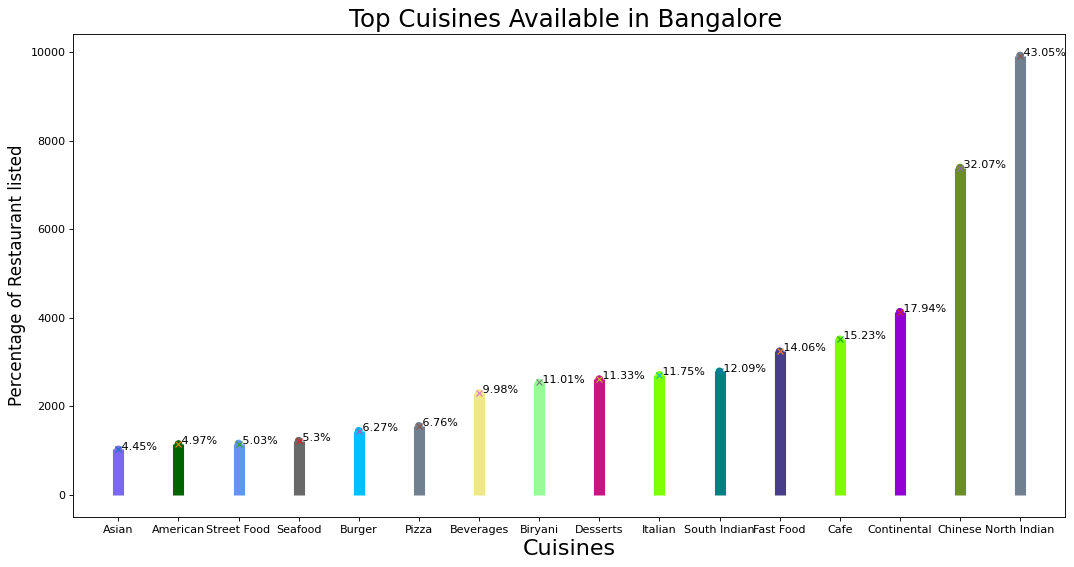

In [29]:
all_colors = list(plt.cm.colors.cnames.keys())
c = random.choices(all_colors, k=len(keys))


plt.figure(figsize=(16,8), dpi= 80)
plt.scatter(keys,values,color=c)
plt.vlines(ymin=0, ymax=values, x=keys, color=c, alpha=1, linewidth=10)


for i,j,k in zip(values, keys, plotting_point):
    plt.plot( j,i, "x")
    plt.annotate(str(k),xy=(j,i))


plt.title('Top Cuisines Available in Bangalore ', fontsize=22)
plt.xlabel('Cuisines',fontsize=20,color="black",fontweight='normal')
plt.ylabel('Percentage of Restaurant listed',fontsize=15,color="black",fontweight='normal')
plt.plot()

In [30]:

Location_data = df.filter(['listed_in(city)', 'approx_cost(for two people)', 'rate'])
Location_data['total_restaurant'] = 1

Location_data= Location_data.groupby('listed_in(city)').agg({'approx_cost(for two people)':'mean',
                                                             'total_restaurant':'sum',
                                                             'rate':'mean'
                                                            })
Location_data.rate = np.round(Location_data.rate,2)
Location_data =Location_data.sort_values('approx_cost(for two people)', ascending=False)

Location_data['approx_cost(for two people)'] = Location_data['approx_cost(for two people)'].astype(int)

Location_data= Location_data.sort_values('approx_cost(for two people)', ascending=True)


In [31]:
average_cost = (df[df['approx_cost(for two people)']!=0]['approx_cost(for two people)']).mean()
min_cost=min(df[df['approx_cost(for two people)']!=0]['approx_cost(for two people)'])
max_cost=max(df[df['approx_cost(for two people)']!=0]['approx_cost(for two people)'])

average_rate=(df[df['rate']!=0]['rate']).mean()
min_rate=min(df[df['rate']!=0]['rate'])
max_rate=max(df[df['rate']!=0]['rate'])

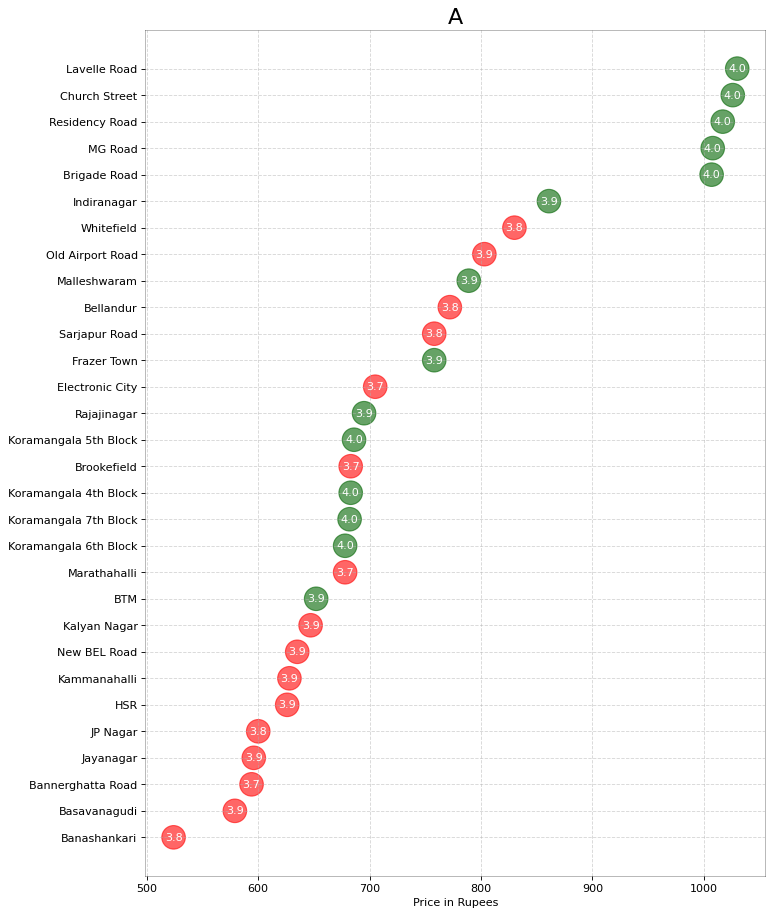

In [32]:
 
Location_data['colors_rate'] = ['red' if  x< average_rate else 'darkgreen' for x in Location_data['rate']]


plt.figure(figsize=(10,14), dpi= 80)
plt.scatter(Location_data['approx_cost(for two people)'], Location_data.index, s=450, alpha=.6, color=Location_data.colors_rate)
#Annotating
for x, y, tex in zip(Location_data['approx_cost(for two people)'], Location_data.index, Location_data['rate']):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})



plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
# plt.yticks(df.index, df.cars)
plt.title('A', fontdict={'size':20})
plt.xlabel('Price in Rupees')
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()

In [33]:
#Creating a dictionary to hold the count of dishes based on the presence of dish in the best dishes column
dishes_set = {}

#Funtion to keep the dishes count
def find_favt_dish(dishes):
    for dish in dishes:
        if dish in dishes_set.keys():
            dishes_set[dish]+=1
        else:
            dishes_set[dish]=1

df.dish_liked.apply(find_favt_dish)
#Deleting nan value
# del dishes_set['nan']
#Sorting the dataframe 
liked_dishes_list = (sorted(dishes_set.items(), key=lambda x: x[1], reverse=True))


In [34]:
top_15_dishes=pd.DataFrame(liked_dishes_list[:15],columns=['Dishes','Count'])
# plt.barh(top_15_dishes['Dishes'],top_10_dishes['Count'])


fig = px.bar(top_15_dishes, x="Dishes", y="Count", text="Count")

fig.update_traces(textposition='inside',marker_color='#de5f30',width=0.5)

fig.update_layout(
    height=500,
    title_text='Top Dishes liked by People',
    plot_bgcolor='#c3eb34'
)

fig.show()

Text(0.5, 1.0, 'Count of Restraunts accepting Online Orders VS ratings')

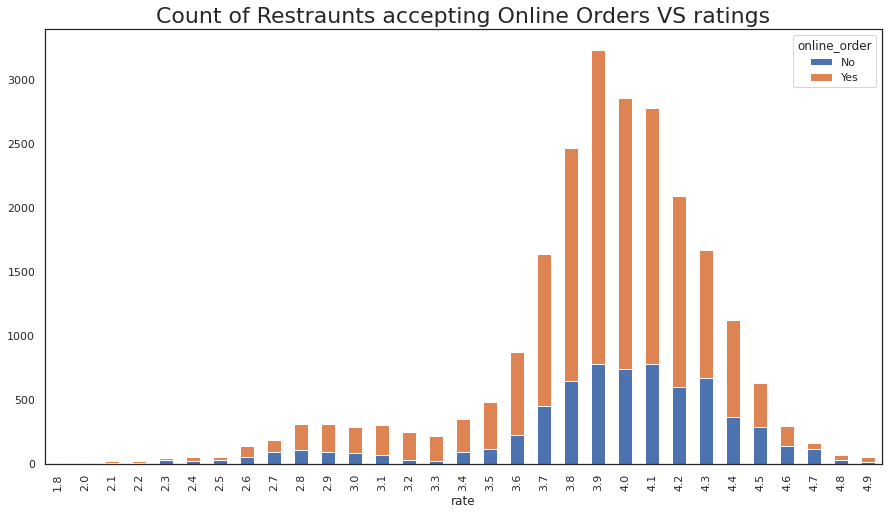

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('white')
y=pd.crosstab(df.rate,df.online_order)
y.plot(kind='bar',stacked=True)
plt.title("Count of Restraunts accepting Online Orders VS ratings",fontsize=22)
